In [27]:
from sklearn.datasets.samples_generator import make_blobs


In [28]:
X, y = make_blobs(n_samples=15, centers=3, n_features=2)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

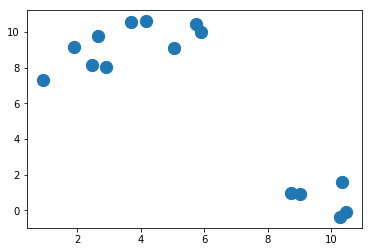

In [29]:
plt.scatter(X[:,0],X[:,1],s=150)
plt.show()

In [8]:
colors=10*["g","r","b","c","k"]


In [35]:
class Mean_Shift:
    def __init__(self,radius=4):
        self.radius=radius
    
    def fit(self,data):
        centroids={}
        for i in range(len(data)):
            centroids[i]=data[i]
        
        while True:
            new_centroids=[]
            for i in centroids:
                bandwidth=[]
                centroid=centroids[i]
                for featuresets in data:
                    if np.linalg.norm(featuresets-centroid)<self.radius:
                        bandwidth.append(featuresets)
                
                new_centroid=np.average(bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))
            uniques=sorted(list(set(new_centroids)))
            
            pre_centroids=dict(centroids)
            centroids={}
            
            for i in range(len(uniques)):
                centroids[i]=np.array(uniques[i])
            
            optimized=True
            
            for i in centroids:
                if not np.array_equal(centroids[i],pre_centroids[i]):
                    optimized=False
                if not optimized:
                    break
            if optimized:
                break
        
        self.centroids=centroids

In [36]:
clf=Mean_Shift()
clf.fit(X)
centroids=clf.centroids


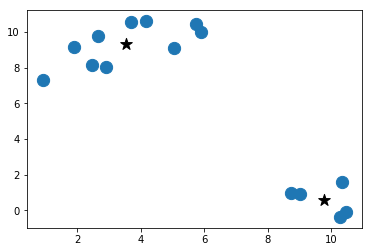

In [37]:
plt.scatter(X[:,0],X[:,1],s=150)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1],color='k',marker='*',s=150)
    
plt.show()
